In [76]:
# (inscrutable setup mumbo-jumbo)

%matplotlib inline

import numpy as np
import requests
import imageio
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from os.path import exists
from matplotlib import animation
from numba import jit as execute_quickly

import youtube_dl

In [77]:
!rm basketball-bounce.mp4

rm: das Entfernen von 'basketball-bounce.mp4' ist nicht möglich: Datei oder Verzeichnis nicht gefunden


In [78]:
if 1:
    video_url = None
    video_filename = "basketball-bounce.mp4"

    if not exists(video_filename):
        ydl_opts = {"outtmpl": video_filename}
        with youtube_dl.YoutubeDL(ydl_opts) as ydl:
            ydl.download(["https://www.youtube.com/watch?v=ZvgJ7mVxeg0"])

    fps = 24
    start_frame = int(3.5*fps)
    stop_frame = int(5.5*fps)

[youtube] ZvgJ7mVxeg0: Downloading webpage
[youtube] ZvgJ7mVxeg0: Downloading video info webpage
[download] Destination: basketball-bounce.f135.mp4
[download] 100% of 6.39MiB in 00:00
[download] Destination: basketball-bounce.mp4.f140
[download] 100% of 1.39MiB in 00:00
[ffmpeg] Merging formats into "basketball-bounce.mp4"
Deleting original file basketball-bounce.f135.mp4 (pass -k to keep)
Deleting original file basketball-bounce.mp4.f140 (pass -k to keep)


In [79]:
if video_url is not None and not exists(video_filename):
    r = requests.get(video_url, stream=True)
    r.raise_for_status()

    size = 0
    with open(video_filename, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=1024*1024):
            print(".", end="", flush=True)
            size += len(chunk)
            fd.write(chunk)
    print()
    print(f"received {size/1024/1024:.1f} MB...")

    print("done")

In [80]:
vid_reader = imageio.get_reader(video_filename,  'ffmpeg')

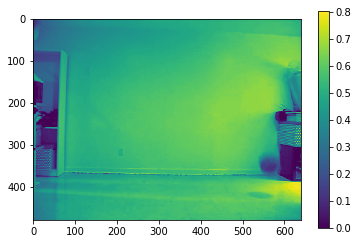

In [81]:
def get_frame(frame_nr):
    img = Image.fromarray(vid_reader.get_data(frame_nr)).convert("L")
    return np.array(img, dtype=np.float32)/255

def get_framediff(frame_nr):
    return get_frame(frame_nr+1) - np.array(get_frame(frame_nr), dtype=np.float32)

plt.imshow(get_frame(int(5.5*fps)))
plt.colorbar()

In [66]:
nframes = stop_frame - start_frame

pos = np.zeros((2, nframes))

for i in range(nframes):
    print(f"{i}/{nframes}")
    fd = get_framediff(start_frame + i)
    ys, xs = np.where(abs(np.minimum(fd, 0)) > 0.15)
    pos[0, i] = np.median(xs)
    pos[1, i] = np.median(ys)

0/48
1/48
2/48
3/48
4/48
5/48
6/48
7/48
8/48
9/48
10/48
11/48
12/48
13/48
14/48
15/48
16/48
17/48
18/48
19/48
20/48
21/48
22/48
23/48
24/48
25/48
26/48
27/48
28/48
29/48
30/48
31/48
32/48
33/48
34/48
35/48
36/48
37/48
38/48
39/48
40/48
41/48
42/48
43/48
44/48
45/48
46/48
47/48


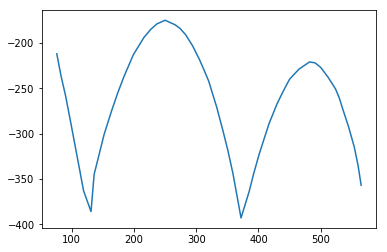

In [70]:
plt.plot(pos[0], -pos[1])